<a href="https://colab.research.google.com/github/annosi/python-starter-codes/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.

In [ ]:
#importing file from computer into colab
from google.colab import files
uploaded = files.upload()

Saving fcc-forum-pageviews2.csv to fcc-forum-pageviews2 (4).csv


In [ ]:
#converting csv into pandas dataframe. I also set index as data and parsed the date column
import io
data = pd.read_csv(io.BytesIO(uploaded['fcc-forum-pageviews2.csv']),parse_dates=True,index_col='date')
data.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [ ]:
#decided to first sort the data by value column
data.sort_values(['value', 'date'],inplace=True)
data.head()

,value
date,
2016-05-09,1201
2016-05-11,1716
2016-05-10,2329
2016-05-16,2591
2016-05-15,2927


In [ ]:
#identified the bottom 2.5%
bottom = data['value'].quantile(0.025)
bottom

17876.4

In [ ]:
#identified the upper 2.5%
upper = data['value'].quantile(0.975)
upper

177613.075

In [ ]:
#deleted the bottom 2.5%
data.drop(data[data['value']<bottom].index,inplace=True)
data.head()

,value
date,
2016-05-26,18060
2016-06-08,18072
2016-06-09,18139
2016-06-07,18335
2016-06-15,18584


In [ ]:
#deleted the upper 2.5%
data.drop(data[data['value']>upper].index,inplace=True)
data.tail()

,value
date,
2019-09-09,174212
2018-10-15,174639
2018-10-12,176175
2019-10-25,176921
2019-11-08,177588


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

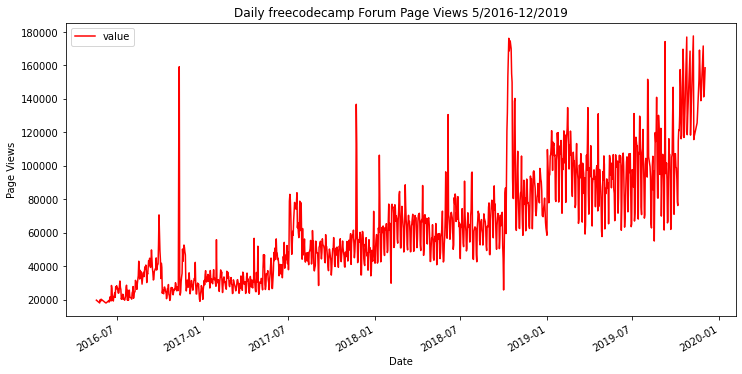

In [ ]:
#used matplotlib to draw a line plot
data.plot(kind='line',y='value',title='Daily freecodecamp Forum Page Views 5/2016-12/2019',xlabel='Date',ylabel='Page Views',color='red',figsize=(12,6))
plt.show()

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [ ]:
#I split the date column into month and year columns
data['month'] = data.index.strftime('%B')
data['year'] = data.index.strftime('%Y')

data.head()

,value,month,year
date,,,
2016-05-26,18060,May,2016
2016-06-08,18072,June,2016
2016-06-09,18139,June,2016
2016-06-07,18335,June,2016
2016-06-15,18584,June,2016


In [ ]:
#Grouped the data by year
from datetime import datetime
tough = data.groupby([data.index.year.rename("year"), data.index.month.rename("month")]).mean()
tough.head(20)

value
year month              
2016 5      19432.400000
     6      21875.105263
     7      24109.678571
     8      31049.193548
     9      41476.866667
     10     27398.322581
     11     40448.633333
     12     27832.419355
2017 1      32785.161290
     2      31113.071429
     3      29369.096774
     4      30878.733333
     5      34244.290323
     6      43577.500000
     7      65806.838710
     8      47712.451613
     9      47376.800000
     10     47438.709677
     11     57701.566667
     12     48420.580645

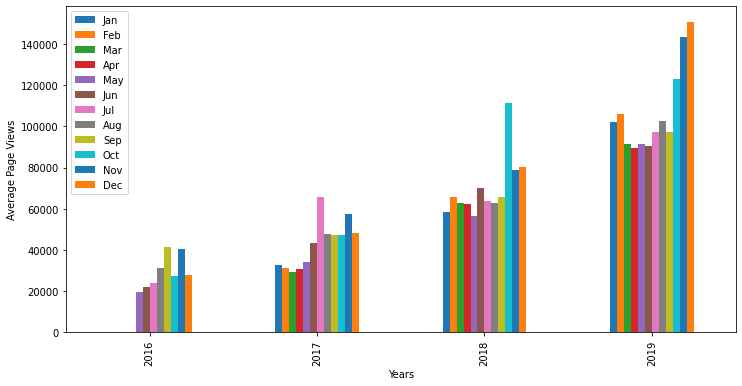

In [ ]:
#Used matplotlib to draw the bar plot. The unstack function was used because of multiindex
tough.unstack(level=1).plot(kind='bar',y='value',xlabel='Years', ylabel='Average Page Views',figsize=(12,6))
plt.legend(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

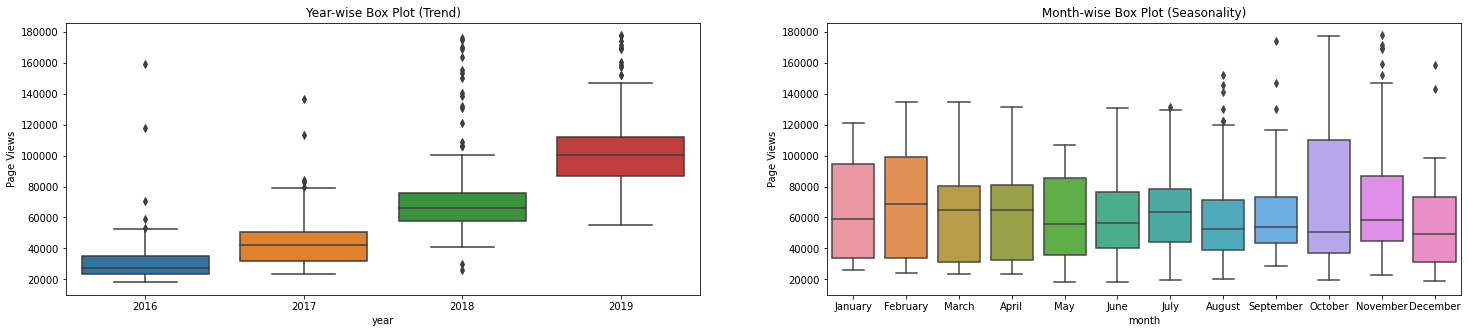

In [ ]:
#I used matplotlib to create the subplots, then seaborn to create the boxplots
fig, axes = plt.subplots(1,2,figsize = (25,5))
grouped_data = data.copy()
grouped_data['month_year'] = grouped_data.index.strftime('%m')

grouped_data.sort_values(['month_year'], inplace=True)
box1 = sns.boxplot(ax=axes[0],x='year',y='value',data=data).set(title='Year-wise Box Plot (Trend)',ylabel='Page Views')
box2 = sns.boxplot(ax=axes[1],x='month',y='value',data=grouped_data).set(title='Month-wise Box Plot (Seasonality)',ylabel='Page Views')

**QUESTION**

How do I make the months show in ascending order from January to December??? Tired of trying to do it